본 블로그의 내용 참고

https://data-marketing-bk.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B5%AC%EC%A1%B0-5-%ED%8A%B8%EB%A6%ACTree-%EB%A7%88%EC%8A%A4%ED%84%B0%ED%95%98%EA%B8%B0

# 1. 트리의 구조

- 트리 : node와 branch를 이용하여, 사이클을 이루지 않도록 구성한 데이터 구조
- 이진트리 형태로 주로 사용됨

## 2. 용어
- node : 데이터를 저장하는 기본 요소
- root node : 맨 위의 노드
- level : 하위 branch로 연결된 노드의 깊이
- parent node : 어떤 노드의 상위 레벨의 노드
- child node : 어떤 노드의 하위 레벨의 노드
- leaf(terminal) node : child 노드가 한 개도 없는 노드
- sibling node : 동일한 parent를 가진 노드
- depth : 트리에서 노드가 가질 수 있는 최대 level

#2. 이진 트리와 이진 탐색 트리

1.  이진 트리 : 노드의 최대 branch가 2개인 트리
2.  이진 탐색 트리 : 이진 트리에 조건이 있는 트리
  - 노드의 왼쪽에는 root node보다 작은 값, 오른쪽에는 큰 값을 갖는 구조  

#3. 구현

##1. 노드 클래스 만들기

In [ ]:
class node :
  def __init__(self,value) :
    self.value = value    # 노드의 값 지정
    self.right = None   # 오른쪽 공간
    self.left = None    # 왼쪽 공간

In [ ]:
head = node(1)

print(head.value,
      head.right,
      head.left,
      sep = '\n')

1
None
None


##2. 이진 탐색 트리에 데이터 넣기

In [ ]:
class Nodemgmt :
  def __init__(self, head) :
    self.head = head    # Root node

  def insert(self, value) :
    self.current_node = self.head   # Start is Root node

    while True :
      if value < self.current_node.value :  # 집어넣을 값이 기준이 되는 current_node보다 작을 경우 :
        if self.current_node.left != None :
          self.current_node = self.current_node.left  # 왼쪽으로 이동
        else :
          self.current_node.left = node(value) # left에 value를 집어넣고
          break #break
      else :
        if self.current_node.right != None :
          self.current_node = self.current_node.right
        else :
          self.current_node.right = node(value)
          break
  def search(self,value) :
    self.current_node = self.head

    while self.current_node :
      if self.current_node.value == value :
        return True

      elif value < self.current_node.value :
        self.current_node = self.current_node.left

      else :
        self.current_node = self.current_node.right

    return False


In [ ]:
bst = Nodemgmt(head)
bst.insert(2)

In [ ]:
print(head.value,
      head.left,
      head.right.value,
      sep = '\n')

1
2


##3. 탐색 기능 구현

In [ ]:
def search(self,value) :
  self.current_node = self.head

  while self.current_node :
    if self.current_node.value == value :
      return True

    elif value < self.current_node.value :
      self.current_node = self.current_node.left

    else :
      self.current_node = self.current_node.right

  return False

In [ ]:
head = node(1)
bst = Nodemgmt(head)
bst.insert(2)
bst.insert(3)
bst.insert(0)
bst.insert(4)
bst.insert(5)
bst.insert(8)

In [ ]:
bst.search(3)


True

#4. 이진 트리에서의 삭제

##1. Leaf Node 삭제

- 삭제할 node의 parent node가 삭제할 node를 지칭하지 않도록 주의

##2. child node가 하나인 node 삭제
- 삭제할 node의 parent node가 삭제할 node의 child node를 구성해야 함

** child노드를 삭제한 후 parent와 child의 child를 붙이는 작업 필요

## 3. child node가 두 개인 node 삭제

- 트리 구조상 하나의 노드는 최대 2개의 child를 갖는다.
- 그렇기에, 오른쪽의 child를 parent로 지정하는 작업이 필요

삭제할 노드를 search

In [ ]:
def delete(self, value) :
  search = False
  self.current_node = self.head
  self.parent = self.head

  while self.current_node :
    if self.current_node.value == value :
      search =  True
      self.current_node.value = None
      break
    elif value < self.current_node.value :
      self.parent = self.current_node
      self.current_node = self.current_node.left

    else :
      self.parent = self.current_node
      self.current_node = self.current_node.right

  if search == False :
    return False

### case1 : 삭제할 node가 leaf일 경우

In [ ]:
#self.current_node가 삭제할 node, self.parent는 삭제할 node의 parent인 상태

if self.current_node.left == None and self.currnet_node.right == None :   # 좌우 child가 없을 대
  if value < self.parent.value :    # 작으면
    self.parent.left = None   # 왼쪽 삭제
  else :  # 크면
    slef.parent.right = None    # 오른쪽 삭제

###case2. 삭제할 node가 child를 한 개 갖는 경우

In [ ]:
if self.currrnet_node.left != None and self.current_node.right == None :
  if value < self.parent.value :
    self.parent_left = self.current_node.left
  else :
    self.parent_right = self.current_node.left

elif self.current_node.left == None and self.current_node.right != None :
  if value < self.parent.value :
    self.parent_left = self.current_node.right
  else :
    self.panret_right = self.current_node.right

### case3-1. 삭제할 노드의 child가 두 개이면서 부모의 왼쪽에 있는 경우

1. 삭제할 노드의 오른쪽 자식 중 가장 작은 값을 삭제할 노드의 부모로 변경
2. 삭제할 노드의 왼쪽 자식 중에서 가장 큰 값을 삭제할 노드의 부모로 변경

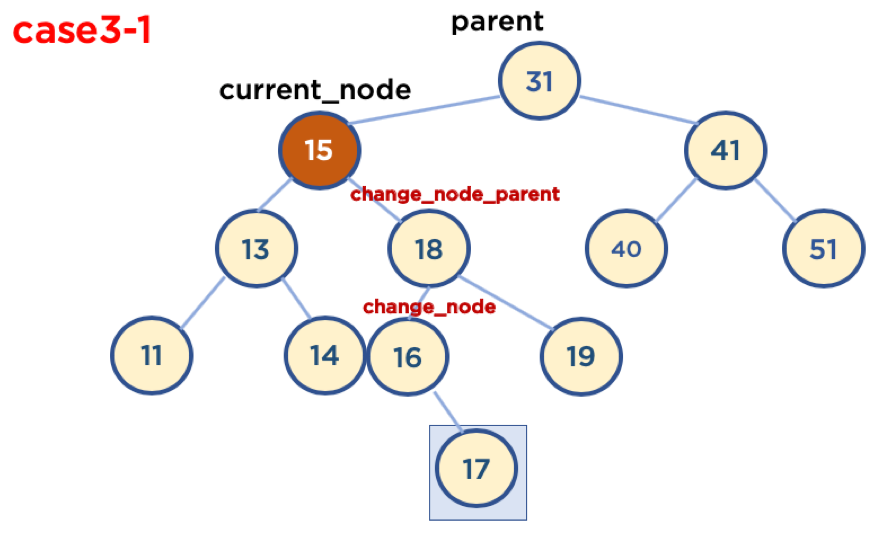

In [ ]:
if self.current_node.left != None and self.current_node.right != None :   # 자식 노드가 2개 있을 때
  if value < self.parent.value :        # 집어넣은 값이 부모의 값보다 적을 경우
    self.change_node = self.current_node.right
    self.chagne_node_parent = self.current_node.right

    while self.change_node.left != None :
      self.change_node_parent = self.change_node
      self.change_node = self.chagne_node.left

    if self.change_node.right != None :
      self.change_node_parent.left = self.chagne_node.right

    else :
      self.change_node_parent.left = None

    self.parent.left = self.change_node
    self.change_node.right = self.current_node.right
    self.change_node.left = self.change_node.lef우

### case 3-2 : 삭제할 노드가 자식을 두 개 갖고있으며, 부모의 오른쪽에 존재할 경우

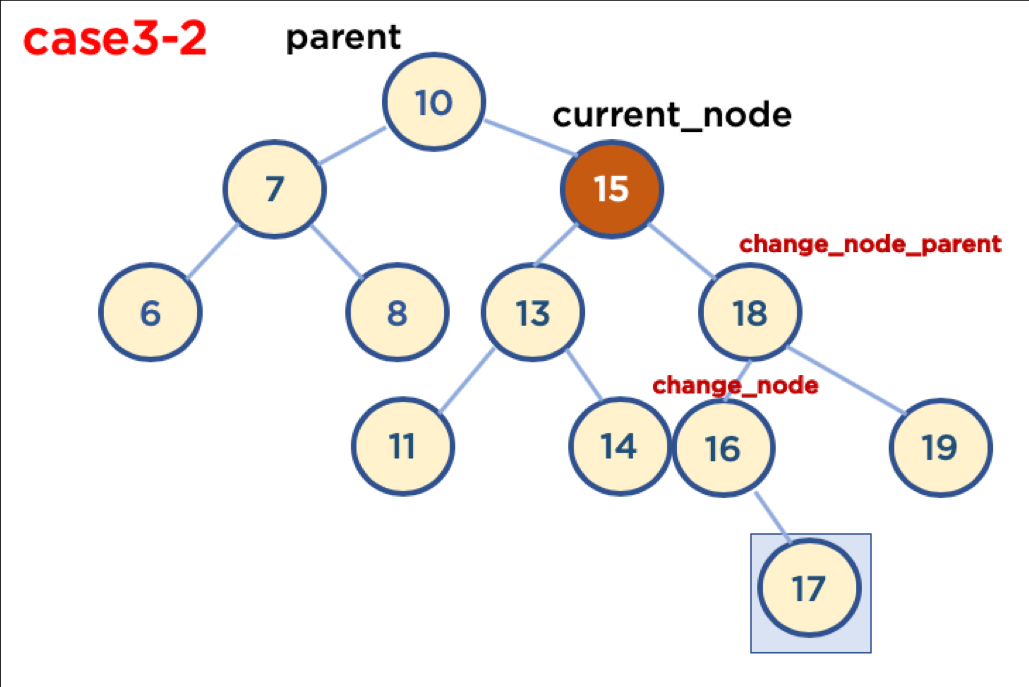

1. 삭제할 노드가 부모의 오른쪽, 삭제할 노드의 오른쪽 자식 중, 가장 작은 값을 가진 노드의 자식이 없을 경우
2. 삭제할 노드가 부모의 오른쪽, 삭제할 노드의 오른쪽 자식 중, 가장 작은 값을 가진 노드의 오른쪽에 자식이 있을 경우

In [ ]:
else :
  self.change_node = self.currrnet_node.right
  self.chagne_node_parent = self.current_node.right

  while self.chagne_node.left != None :
    self.change_node_parent = self.change_node
    self.change_node = self.change_node.left

  if self.change_node.right != None :
    self.change_node_parent.left = self.change_node.right

  else :
    self.change_node_parent.left = None

  self.parent.right = self.change_node
  self.change_node.left = self.current_node.left
  self.change_node.right = self.current_node.right